In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
!pip install imbalanced-learn --upgrade
!pip install plotly --upgrade

     |████████████████████████████████| 1.5MB 5.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 6.8 MB 4.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 14.5 MB 101 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albu

     |████████████████████████████████| 167 kB 4.4 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3
     |████████████████████████████████| 13.1 MB 4.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# Μεγάλο Dataset (B10)
Epileptic Seizure Recognition Data Set

## Βασικές Πληροφορίες
Το Dataset περιέχει δεδομέvα εγκεφαλικής δραστηριότητας 500 ασθενών,
καταγεγραμένα με εγκεφαλογράφημα (Electroencephalogtam - EEG) για 23.5
δευτερόλεπτα. Η εγκεφαλική δραστηριότητα του κάθε ασθενούς χωρίζεται σε
χρονοσειρές (σειρές - rows) του ενός δευτερολέπτου, τα οποία στη συνέχεια
αντιστοιχίζονται σε μια από 5 πέντε labels (Y = {1,2,3,4,5}). Οι ταμπέλες
αντιστοιχίζονται ως εξής:
1. Υ = 1. Τα δεδομέvα λήφθηκαν κατά επιληπτικό επεισόδιο.
2. Υ = 2. Τα δεδομέvα λήφθηκαν από περιοχή με όγκο.
3. Υ = 3. Τα δεδομέvα λήφθηκαν από εγκέφαλο με όγκο, αλλά υγιή εγκεφαλική
   περιοχή.
4. Υ = 4. Τα δεδομέvα λήφθηκαν με τον ασθενή να έχει τα μάτια κλειστά.
5. Υ = 5. Τα δεδομέvα λήφθηκαν με τον ασθενή να έχει τα μάτια ανοιχτά.

Επισημαίνεται ότι οι ασθενείς στις κλάσεις 2,3,4 και 5 δεν είχαν επιληπτικό
επεισόδιο, και η συχνότερη χρήση του dataset είναι για δυαδική ταξινόμηση
(binary classification) της κλάσης 1 έναντι των υπολοίπων (πρόβλεψη εμφάνισης επιληπιτκού επεισοδίου). Κάθε γραμμή (δείγμα) του ενός δευτερολέπτου περιέχει 178 data points εγκεφαλικής δραστηριότητας - 178 χαρακτηριστικά, όλα διατεταγμένα. Επιπλέον, το dataset περιέχει ένα label ανά δείγμα, και έχει 23 * 500 = 11500 γραμμές (δείγματα).

In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, confusion_matrix, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go


df = pd.read_csv("big_dataset_data.csv")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
df.shape

(11500, 180)

Όπως φαίνεται παραπάνω κάθε entry του dataset είναι αριθμημένο, και έχει 180 στήλες. Η πρώτη, μη οναμασμένη στήλη είναι το μοναδικό id της χρονοσειράς. Οι επόμενες στήλες, με επικεφαλίδες Χ1 έως Χ178 είναι τα 178 δείγματα που λήφθηκαν από τον ασθενή κατά το ένα δευτερόλεπτο EEG και τέλος, η στήλη 180 έχει οναμστεί y και είναι η ετικέτα κλάσης του δείγματος. Επιπλέον, βλέπουμε οτι το dataset περιέχει 11500 δείγματα, όπως περιμέναμε.

Για την εισαγωγή αυτών των δεδομένων, δεν χρειάστηκαν μετατροπές στο αρχείο εισόδου. Αφού όμως θα κάνουμε binary classification στην εμφάνιση ή μη επιληπτικού επεισοδίου, ενδιαφερόμαστε για όταν στο δείγμα ανήκει στην κλάση y = 1 ή όχι (y = 2,3,4,5). Για αυτό θα προσθέσουμε κατάλληλη στήλη εξόδου.

In [ ]:
df["out_label"] = (df['y'] ==  1)
df["out_label"] = df["out_label"].astype(int)
# df.head()

Πλέον, μπορούμε να αφαιρέσουμε τις στήλες με τα id, και το y.

In [ ]:
df.drop(columns = ['Unnamed: 0'], axis=1, inplace = True)
df.drop(columns = ['y'], axis=1, inplace = True)
# keep column names for use in later training and test dataframes
data_column_names = df.columns[:-1]
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,out_label
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


Στο dataframe που θα χρησημοποιήσουμε λοιπόν θα έχουμε 179 στήλες, οι πρώτες 178 θα αποτελούν τα χαρακτηριστικά του δείγματος και η 179η στήλη, με το όνομα `out_label` την ετικέτα. Όλα όσα προαναφέραμε για το μη-τροποποιημένο dataset ισχύουν.

Στην συνέχεια, βρίσκουμε ότι το dataset δεν περιέχει δείγματα με απουσιάζουσες τιμες.

In [ ]:
entries_w_na = 0
for index, data in df.iterrows():
    entries_w_na += (data.isna().sum() != 0)
print("Samples with NaN datapoints: "+str(entries_w_na))

Samples with NaN datapoints: 0


Και επιπλέον, υπολογίζουμε ότι 20% των δειγμάτων ανήκουν στην κλάση 1, δηλαδή στα δείγματα που εμφανίζουν επιληπτικό επεισόδιο. Αντιλαμβανόμαστε λοιπόν ότι τo dataset δεν είναι ισορροπημένο.

In [ ]:
def calc_percent_true(array):
    return sum(array) / len(array)
percent_true = calc_percent_true(df["out_label"].values)
print("Percentage of class 0 samples: "+str(1 - percent_true))
print("Percentage of class 1 samples: "+str(percent_true))

Percentage of class 0 samples: 0.8
Percentage of class 1 samples: 0.2


Στην συνέχεια θα χωρίσουμε το δοσμένο dataset σε δεδομένα εκπαίδευσης και δεδομένα αξιολόγησης των μοντέλων.
Επιλέγουμε ποσοστό 70% - 30% αντίστοιχα. Θα εφαρμόσουμε την τεχνική random oversampling στα δεδομένα εκπαίδευσης, με στόχο να έχουμε ένα ισορροπημένα δεδομένα εκπαίδευσης, με ίσο αριθμό δειγμάτων και στις 2 κλάσεις.

In [ ]:
(train_df, test_df) = train_test_split(df, test_size=0.3)

In [ ]:
print("train_df shape: (" + str(train_df.shape[0])+", "+ str(train_df.shape[1])+").")
print("test_df shape: (" + str(test_df.shape[0])+", "+ str(test_df.shape[1])+").")

train_df shape: (8050, 179).
test_df shape: (3450, 179).


Για τις ανάγκες oversampling, πρέπει να χωρίσουμε τα χαρακτηριστικά του dataframe από τις αντίστοιχες ταμπέλες.

In [ ]:
train_labels = train_df.pop('out_label').values
train_data = train_df.values
test_labels = test_df.pop('out_label').values
test_data = test_df.values

In [ ]:
ros = RandomOverSampler(random_state=0)

train_data_resampled, train_labels_resampled = ros.fit_sample(train_data,train_labels);
percent_true = calc_percent_true(train_labels_resampled)
print("Percentage of class 0 samples: "+str(1 - percent_true))
print("Percentage of class 1 samples: "+str(percent_true))

Percentage of class 0 samples: 0.5
Percentage of class 1 samples: 0.5


## Baseline Classifiers

Όπως προαναφέραμε, στο dataset δεν έχουμε απουσιάζουσες τιμές και επανάληψη δειγμάτων. Για την ενότητα αυτή θα εκπαιδεύσουμε τους ταξινομητές μας χρησημοποιώντας τα δεδομένα που δεν έχουν υποβληθεί σε προεπεξεργασία και επιπλέον δεν θα αλλάξουμε τις υπερπαραμέτρους των ταξινομητών.

In [ ]:
start = datetime.now() # <-- Start timing from here
dummy_clf = DummyClassifier(strategy  = 'stratified', random_state=0)
dummy_clf.fit(train_data,train_labels)
end = datetime.now() # <-- Stop timing here
print('Training Dummy done. Time: '+str(end-start))

dummy_predict = dummy_clf.predict(test_data)

Training Dummy done. Time: 0:00:00.001567


In [ ]:
start = datetime.now() # <-- Start timing from here
gaussian_clf = GaussianNB()
gaussian_clf.fit(train_data, train_labels)
end = datetime.now() # <-- Stop timing here
print('Training done. Time: '+str(end-start))

gaussian_predict = gaussian_clf.predict(test_data)

Training done. Time: 0:00:00.046867


In [ ]:
start = datetime.now() # <-- Start timing from here
knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(train_data, train_labels)
end = datetime.now() # <-- Stop timing here
print('Training done. Time: '+str(end-start))

knn_predict = knn_clf.predict(test_data)

Training done. Time: 0:00:00.323190


In [ ]:
start = datetime.now() # <-- Start timing from here
mlp_clf = MLPClassifier(random_state=0)
mlp_clf.fit(train_data, train_labels)
end = datetime.now() # <-- Stop timing here
print('Training done. Time: '+str(end-start))

mlp_predict = mlp_clf.predict(test_data)

Training done. Time: 0:00:14.430830


In [ ]:
start = datetime.now() # <-- Start timing from here
svm_clf = SVC()
svm_clf.fit(train_data, train_labels)
end = datetime.now() # <-- Stop timing here
print('Training done. Time: '+str(end-start))

svm_predict = svm_clf.predict(test_data)

Training done. Time: 0:00:08.328335


Σημειώνουμε ότι σύμφωνα με το documentation, η ρουτίνα classification report παραλείπει το f1 micro score στην εμφάνιση των αποτελεσμάτων επειδή για προβλήματα δυαδικής ταξινόμησης (όπως αυτό) ταυτίζεται με το accuracy του ταξινομητή.

### Dummy Classifier

In [ ]:
classifiers = ['Dummy','GNB', 'KNN','MLP','SVM']
f1_scores_micro = np.zeros(5)
f1_scores_macro = np.zeros(5)

Classification report for Dummy Classifier.

              precision    recall  f1-score   support

  No Seizure       0.79      0.50      0.61      2763
     Seizure       0.19      0.48      0.28       687

    accuracy                           0.49      3450
   macro avg       0.49      0.49      0.44      3450
weighted avg       0.67      0.49      0.54      3450

[[0.49583786 0.50416214]
 [0.51528384 0.48471616]]


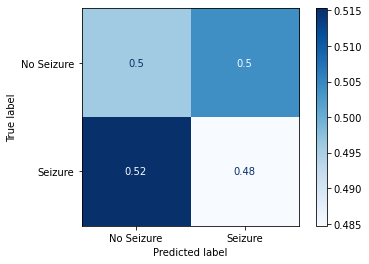

In [ ]:
f1_scores_micro[0] = f1_score(test_labels, dummy_predict, average='micro', zero_division=0)
f1_scores_macro[0] = f1_score(test_labels, dummy_predict, average='macro', zero_division=0)

# print a pretty confusion matrix version
class_labels = ["No Seizure", "Seizure"]
print("Classification report for Dummy Classifier.\n")
print(classification_report(test_labels, dummy_predict,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(dummy_clf, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

### Gaussian Naive Bayesian Classifier

Classification report for Gaussian Naive Bayesian Classifier.

              precision    recall  f1-score   support

  No Seizure       0.97      0.97      0.97      2763
     Seizure       0.87      0.90      0.88       687

    accuracy                           0.95      3450
   macro avg       0.92      0.93      0.93      3450
weighted avg       0.95      0.95      0.95      3450

[[0.96742671 0.03257329]
 [0.10334789 0.89665211]]


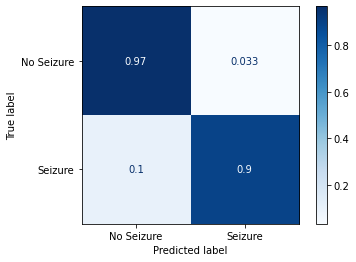

In [ ]:
f1_scores_micro[1] = f1_score(test_labels, gaussian_predict, average='micro', zero_division=0)
f1_scores_macro[1] = f1_score(test_labels, gaussian_predict, average='macro', zero_division=0)

print("Classification report for Gaussian Naive Bayesian Classifier.\n")
print(classification_report(test_labels, gaussian_predict,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(gaussian_clf, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

### KNN Classsifier

Classification report for KNN Classifier.

              precision    recall  f1-score   support

  No Seizure       0.95      0.99      0.97      2763
     Seizure       0.96      0.79      0.86       687

    accuracy                           0.95      3450
   macro avg       0.95      0.89      0.92      3450
weighted avg       0.95      0.95      0.95      3450

[[0.99203764 0.00796236]
 [0.2139738  0.7860262 ]]


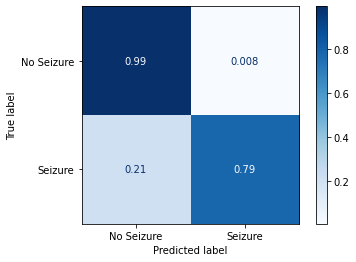

In [ ]:
f1_scores_micro[2] = f1_score(test_labels, knn_predict, average='micro', zero_division=0)
f1_scores_macro[2] = f1_score(test_labels, knn_predict, average='macro', zero_division=0)

print("Classification report for KNN Classifier.\n")
print(classification_report(test_labels, knn_predict,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(knn_clf, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

### Multi-layer Perceptron Classifier

Classification report for MLP Classifier.

              precision    recall  f1-score   support

  No Seizure       0.94      0.90      0.92      2763
     Seizure       0.67      0.77      0.72       687

    accuracy                           0.88      3450
   macro avg       0.80      0.84      0.82      3450
weighted avg       0.89      0.88      0.88      3450

[[0.90481361 0.09518639]
 [0.22998544 0.77001456]]


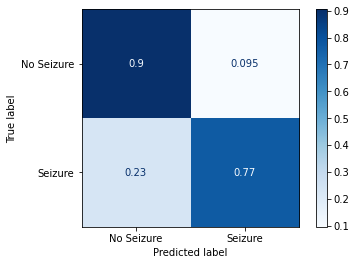

In [ ]:
f1_scores_micro[3] = f1_score(test_labels, mlp_predict, average='micro', zero_division=0)
f1_scores_macro[3] = f1_score(test_labels, mlp_predict, average='macro', zero_division=0)

print("Classification report for MLP Classifier.\n")
print(classification_report(test_labels, mlp_predict,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(mlp_clf, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

### Support Vector Classifier

Classification report for SVM Classifier.

              precision    recall  f1-score   support

  No Seizure       0.99      0.98      0.98      2763
     Seizure       0.91      0.94      0.92       687

    accuracy                           0.97      3450
   macro avg       0.95      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450

[[0.97538907 0.02461093]
 [0.05531295 0.94468705]]


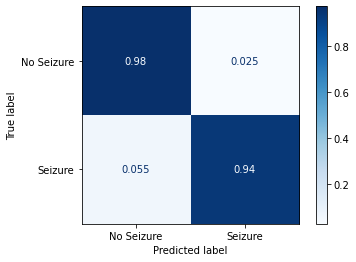

In [ ]:
f1_scores_micro[4] = f1_score(test_labels, svm_predict, average='micro', zero_division=0)
f1_scores_macro[4] = f1_score(test_labels, svm_predict, average='macro', zero_division=0)

print("Classification report for SVM Classifier.\n")
print(classification_report(test_labels, svm_predict,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(svm_clf, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

## Σύγκριση των Baseline Classifiers

Στην συνέχεια θα παρουσιάσουμε την αποδοτικότητα των παραπάνω ταξινομητών με χρήση των f1 micro average και f1 macro average ως μετρικών απόδοσης.

In [ ]:
fig = go.Figure([
    go.Bar(name='Macro',x=classifiers, y=f1_scores_macro,
          text=f1_scores_macro),
    go.Bar(name='Micro',x=classifiers, y=f1_scores_micro,
          text=f1_scores_micro)
])
fig.update_traces(texttemplate='%{text:.3p}',
                  textposition='outside')
fig.update_layout(
    title_text='F1 Average Scores',
    xaxis_title='Classifier',
    legend_title='Averaging Strategy'
)
fig.show()

Εξετάζοντας πρώτα την απόδοση του κάθε ταξινομητή ξεχωριστά με χρήση των confusion matrices σημειώνουμε οτι όλοι έχουν καλύτερη επιτυχία να προβλέπουν τα true negatives παρά τα true positives. Μια πιθανή αιτία για αυτό είναι οτι οι baseline ταξινομητές εκπαιδεύτηκαν με δεδομένα που δεν είχαν γίνει oversampled και άρα εκπαιδεύτηκαν ταυτόχρονα και στην μικρότερη πιθανότητα ένα δείγμα να είναι θετικό.

Στο παραπάνω διάγραμμα παρατηρούμε ότι και οι δύο μετρικές έχουν την ίδια μορφή για όλους τους ταξινομητές: το macro average είναι χαμηλότερο από το micro, και γενικά οι ταξινομητές έχουν μια καλή πιθανότητα πρόβλεψης. Αυτό μας προϊδεάζει για την βελτίωση της απόδοσης τους με την ενσωμάτωση της προεπεξεργασίας και βελτιστοποίησης υπερπαραμέτρων. Επίσης, την καλύτερη αρχική απόδοση είχαν οι ταξινομητές GNB και SVM.

## Βελτιστοποίηση Ταξινομητών

Στην ενότητα αυτή θα προσπαθήσουμε να βελτιώσουμε την απόδοση των προηγούμενων ταξινομητών 1) μέσω της χρήσης προεπεξεργασμένων δεδομένων εκπαίδευσης και 2) την επιλογή κατάλληλων υπερπαραμέτρων για τους ταξινομητές. Για να βρεθεί ο βέλτιστος συνδυασμός υπερπαραμέτρων θα θεωρήσουμε pipelines προεπεξεργασίας - ταξινόμησης, και θα τα συγκρίνουμε με της μέθοδο (5 fold) cross validation.

### Dummy Classifier

In [ ]:
train_data = train_data_resampled
train_labels = train_labels_resampled
f1_best_micro = np.zeros(7)
f1_best_macro = np.zeros(7)

In [ ]:
dummy_pipe = Pipeline([
    ('selector', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('dummy',DummyClassifier()),
], memory='tmp')

dummy_strategy = ['stratified','most_frequent','prior','uniform','constant']
n_components = [10, 20, 40,50,70,80,100, 150]
vthreshold = [0, 52000,55000, 57000, 60000, ]

params = dict(
    selector__threshold = vthreshold,
    dummy__strategy=dummy_strategy,
    pca__n_components = n_components,
)

start = datetime.now() # <-- Start timing from here
dummy_cv_1 = GridSearchCV(dummy_pipe, params, scoring='f1_macro',cv=5,n_jobs=-1)
dummy_cv_1.fit(train_data,train_labels)
dummy_cv_2 = GridSearchCV(dummy_pipe, params, scoring='f1_micro',cv=5,n_jobs=-1)
dummy_cv_2.fit(train_data,train_labels)
end = datetime.now() # <-- Stop timing here
print('Training Dummy done. Time: '+str(end-start))

dummy_predict_1 = dummy_cv_1.predict(test_data)
dummy_predict_2 = dummy_cv_2.predict(test_data)
print("Macro Optimization best params:")
print(dummy_cv_1.best_params_)
print("Micro Optimization best params:")
print(dummy_cv_2.best_params_)

Training Dummy done. Time: 0:03:15.344607
Macro Optimization best params:
{'dummy__strategy': 'stratified', 'pca__n_components': 70, 'selector__threshold': 52000}
Micro Optimization best params:
{'dummy__strategy': 'uniform', 'pca__n_components': 100, 'selector__threshold': 52000}


Βλέπουμε ότι η καλύτερη παραμετρικοποίηση του ταξινομητή εξαρτάται και από την μετρική αξιολόγησής του. Κρατάμε τις σχετικές αποδόσεις για την τελική σύγκριση.

Classification report for Best Dummy Classifier.

Best Macro Average: 0.45119329430497873
              precision    recall  f1-score   support

  No Seizure       0.81      0.50      0.62      2782
     Seizure       0.20      0.51      0.28       668

    accuracy                           0.50      3450
   macro avg       0.50      0.50      0.45      3450
weighted avg       0.69      0.50      0.55      3450



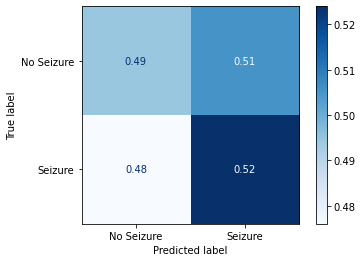

In [ ]:
f1_best_micro[0] = f1_score(test_labels, dummy_predict_2, average='micro', zero_division=0)
f1_best_macro[0] = f1_score(test_labels, dummy_predict_1, average='macro', zero_division=0)

# print a pretty confusion matrix version
print("Classification report for Best Dummy Classifier.\n")
print("Best Macro Average: "+str(f1_best_macro[0]))
print(classification_report(test_labels, dummy_predict_1,
                            target_names=class_labels, zero_division=0))
plot_confusion_matrix(dummy_cv_1.best_estimator_, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')

Best Micro Average:0.49130434782608695
              precision    recall  f1-score   support

  No Seizure       0.80      0.49      0.61      2782
     Seizure       0.18      0.48      0.27       668

    accuracy                           0.49      3450
   macro avg       0.49      0.49      0.44      3450
weighted avg       0.68      0.49      0.54      3450



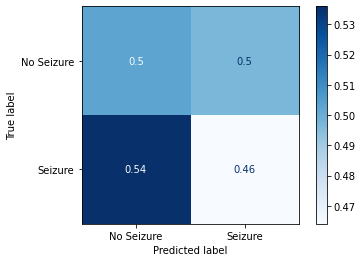

In [ ]:
print("Best Micro Average:"+str(f1_best_micro[0]))
print(classification_report(test_labels, dummy_predict_2,
                            target_names=class_labels, zero_division=0))
plot_confusion_matrix(dummy_cv_2.best_estimator_, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')

### Gaussian Naive Bayesian Classifier

In [ ]:
# GaussianNB has no super-parameters to optimize
# so just use better training data

gnb_pipe = Pipeline([
    ('selector', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('gnb',GaussianNB()),
], memory='tmp')

n_components = [10, 20, 30, 40,60,70,80,100,150]
vthreshold = [0, 55000, 57000, 60000,62000,64000]

params = dict(
    selector__threshold = vthreshold,
    pca__n_components = n_components,
)

start = datetime.now() # <-- Start timing from here
gnb_cv_1 = GridSearchCV(gnb_pipe, params, scoring='f1_macro',cv=5,n_jobs=-1)
gnb_cv_1.fit(train_data, train_labels)
gnb_cv_2 = GridSearchCV(gnb_pipe, params, scoring='f1_micro',cv=5,n_jobs=-1)
gnb_cv_2.fit(train_data, train_labels)
end = datetime.now() # <-- Stop timing here
print('Training GNB done. Time: '+str(end-start))

gaussian_predict_1 = gnb_cv_1.predict(test_data)
gaussian_predict_2 = gnb_cv_1.predict(test_data)
print("Macro Optimization best params:")
print(gnb_cv_1.best_params_)
print("Micro Optimization best params:")
print(gnb_cv_2.best_params_)

Training GNB done. Time: 0:00:48.745215
Macro Optimization best params:
{'pca__n_components': 20, 'selector__threshold': 0}
Micro Optimization best params:
{'pca__n_components': 20, 'selector__threshold': 0}


Βλέπουμε οτι σε αυτή τη περίπτωση, και οι δύο ταξινομητές συνέκλιναν στις ίδιες υπερπαραμέτρους. Δίνουμε λοιπόν εννιαίο classification report.

Classification report for GNB Classifier.

Best Macro Average: 0.945604652853197
Best Micro Average: 0.9657971014492753
              precision    recall  f1-score   support

  No Seizure       0.98      0.98      0.98      2782
     Seizure       0.90      0.92      0.91       668

    accuracy                           0.97      3450
   macro avg       0.94      0.95      0.95      3450
weighted avg       0.97      0.97      0.97      3450

[[0.97663551 0.02336449]
 [0.07934132 0.92065868]]


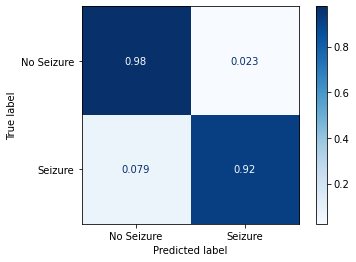

In [ ]:
f1_best_micro[1] = f1_score(test_labels, gaussian_predict_2, average='micro', zero_division=0)
f1_best_macro[1] = f1_score(test_labels, gaussian_predict_1, average='macro', zero_division=0)

# print a pretty confusion matrix version
print("Classification report for GNB Classifier.\n")
print("Best Macro Average: "+str(f1_best_macro[1]))
print("Best Micro Average: "+str(f1_best_micro[1]))
print(classification_report(test_labels, gaussian_predict_1,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(gnb_cv_1.best_estimator_, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

### KNN Classifier

In [ ]:
%%capture output
knn_pipe = Pipeline([
    ('selector', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('knn',KNeighborsClassifier(n_jobs=-1)),
], memory='tmp')

n_components = [10, 20, 30, 40,60,70,80,100,150]
vthreshold = [0, 55000, 57000, 60000,62000,64000]
neighbors = [1,2,3,4]
weights = ['uniform','distance']
metrics = ['euclidean','manhattan','chebyshev','minkowski','mahalanobis','wminkowski']

params = dict(
    selector__threshold = vthreshold,
    pca__n_components = n_components,
    knn__n_neighbors=neighbors,
    knn__weights=weights,
    knn__metric=metrics
)

start = datetime.now() # <-- Start timing from here
knn_cv_1 = GridSearchCV(knn_pipe,params,scoring='f1_macro', cv=5,n_jobs=-1)
knn_cv_1.fit(train_data,train_labels)
knn_cv_2 = GridSearchCV(knn_pipe,params,scoring='f1_micro', cv=5,n_jobs=-1)
knn_cv_2.fit(train_data,train_labels)
end = datetime.now() # <-- Stop timing here
print('Training KNN done. Time: '+str(end-start))

knn_predict_1 = knn_cv_1.predict(test_data)
knn_predict_2 = knn_cv_2.predict(test_data)
print("Macro Optimization best params:")
print(knn_cv_1.best_params_)
print("Micro Optimization best params:")
print(knn_cv_2.best_params_)

In [ ]:
output.show()

Training KNN done. Time: 6:22:13.369800
Macro Optimization best params:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 70, 'selector__threshold': 55000}
Micro Optimization best params:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 70, 'selector__threshold': 55000}


Classification report for Best KNN Classifier.

Best Macro Average: 0.8824752746443931
Best Micro Average: 0.9359420289855073
              precision    recall  f1-score   support

  No Seizure       0.93      1.00      0.96      2782
     Seizure       0.99      0.68      0.80       668

    accuracy                           0.94      3450
   macro avg       0.96      0.84      0.88      3450
weighted avg       0.94      0.94      0.93      3450

[[0.99856219 0.00143781]
 [0.3248503  0.6751497 ]]


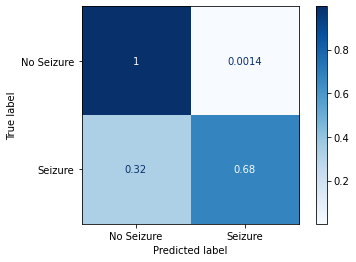

In [ ]:
f1_best_micro[2] = f1_score(test_labels, knn_predict_2, average='micro', zero_division=0)
f1_best_macro[2] = f1_score(test_labels, knn_predict_1, average='macro', zero_division=0)

# print a pretty confusion matrix version
print("Classification report for Best KNN Classifier.\n")
print("Best Macro Average: "+str(f1_best_macro[2]))
print("Best Micro Average: "+str(f1_best_micro[2]))
print(classification_report(test_labels, knn_predict_1,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(knn_cv_1, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

Συγκρίνοντας αυτή την τελευταία έκδοση του KNN ταξινομητή με την baseline βρίσκουμε σημαντική βελτίωση της απόδοσης με χρηση της προεπεξεργασίας και του cross validation. Αξίζει να σημειωθεί ότι - όπως και ο baseline ταξινομητής - έχουμε καλύτερη επιτυχία στην πρόβλεψη true negative παρά true positive. Μάλιστα, η εμφάνιση false negative είναι σχεδόν μηδαμινή. Έχουμε λοιπόν ένα ταξινομητή πολύ ικανό να ανιχνεύει την έλλειψη επιληπτικής κρίσης.

Βρίσκουμε συνολικά ότι η χρήση PCA βελτιώνει την ικανότητα του KNN και άρα διατηρούμε την προηγούμενη ως βέλτιστη υλοποίησή του.

### Multi-layer Perceptron Classifier
Επειδή η εφαρμογή cross vailidation σε όλες τις παραμέτρους MLP θα καθυστερήσει την εκτέλεση των folds, θα προσπαθήσουμε να βελτιστοποιήσουμε εκτελόντας διαδοχικά τα βήματα του grid search.

In [ ]:
%%capture output_mlp
mlp_pipe = Pipeline([
    ('selector', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('mlp',MLPClassifier(early_stopping=True,random_state=0)),
], memory='tmp')

n_components = [ 20, 40, 60]
vthreshold = [55000, 60000]
layer_sizes = [(60,),(80,),(100,)]
activation = ['relu', 'tanh']
solver = ['adam','sgd']
max_iter = [100,200]
learning_rate = ['constant','adaptive']
alpha = [0.1e-4, 1e-4]

params = dict(
    selector__threshold = vthreshold,
    pca__n_components = n_components,
    mlp__hidden_layer_sizes=layer_sizes,
    mlp__activation=activation,
    mlp__solver=solver,
    mlp__max_iter=max_iter,
    mlp__learning_rate=learning_rate,
    mlp__alpha=alpha
)

start = datetime.now() # <-- Start timing from here
mlp_cv_1 = GridSearchCV(mlp_pipe,params, scoring='f1_macro', cv=5,n_jobs=-1)
mlp_cv_1.fit(train_data, train_labels)
end = datetime.now() # <-- Stop timing here
print('Training MLP_1 done. Time: '+str(end-start))

start = datetime.now() # <-- Start timing from here
mlp_cv_2 = GridSearchCV(mlp_pipe,params, scoring='f1_micro', cv=5,n_jobs=-1)
mlp_cv_2.fit(train_data, train_labels)
end = datetime.now() # <-- Stop timing here
print('Training MLP_2 done. Time: '+str(end-start))

mlp_predict_1 = mlp_cv_1.predict(test_data)
mlp_clf_1 = mlp_cv_1.best_estimator_
print(mlp_cv_1.best_params_)

mlp_predict_2 = mlp_cv_2.predict(test_data)
mlp_clf_2 = mlp_cv_2.best_estimator_
print(mlp_cv_2.best_params_)

In [ ]:
print(output_mlp)

Training MLP_1 done. Time: 2:45:43.981101
Training MLP_2 done. Time: 2:47:22.379344
{'mlp__activation': 'tanh', 'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 100, 'mlp__solver': 'adam', 'pca__n_components': 60, 'selector__threshold': 55000}
{'mlp__activation': 'tanh', 'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 100, 'mlp__solver': 'adam', 'pca__n_components': 60, 'selector__threshold': 55000}



In [ ]:
print("Classification Report for F1-Macro Optimized MLP")
print(classification_report(test_labels, mlp_predict_1))

print("Classification Report for F1-Micro Optimized MLP")
print(classification_report(test_labels, mlp_predict_2))

Classification Report for F1-Macro Optimized MLP
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2783
           1       0.95      0.89      0.92       667

    accuracy                           0.97      3450
   macro avg       0.96      0.94      0.95      3450
weighted avg       0.97      0.97      0.97      3450

Classification Report for F1-Micro Optimized MLP
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2783
           1       0.95      0.89      0.92       667

    accuracy                           0.97      3450
   macro avg       0.96      0.94      0.95      3450
weighted avg       0.97      0.97      0.97      3450



Classification report for Best MLP Classifier.

              precision    recall  f1-score   support

  No Seizure       0.97      0.99      0.98      2783
     Seizure       0.95      0.89      0.92       667

    accuracy                           0.97      3450
   macro avg       0.96      0.94      0.95      3450
weighted avg       0.97      0.97      0.97      3450

[[0.96047431 0.03952569]
 [0.12443778 0.87556222]]


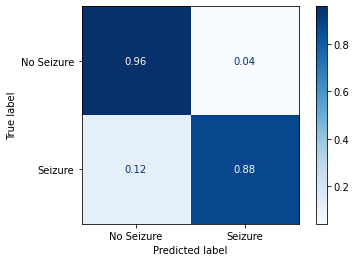

In [ ]:
f1_best_micro[3] = f1_score(test_labels, mlp_predict_2, average='micro', zero_division=0)
f1_best_macro[3] = f1_score(test_labels, mlp_predict_1, average='macro', zero_division=0)

# print a pretty confusion matrix version
print("Classification report for Best MLP Classifier.\n")
print(classification_report(test_labels, mlp_predict_1,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(mlp_clf, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

### Linear Support Vector Classifier

In [ ]:
lsv_pipe = Pipeline([
    ('selector', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('lsv',LinearSVC(random_state=0)),
], memory='tmp')

n_components = [ 40,60,80,100]
vthreshold = [0, 52000, 55000, 57000, 60000]
loss = ['hinge','squared_hinge']
tolerance = [1e-5 , 1e-4, 1e-3]
c = [50,52,55,58, 60]

params = dict(
    selector__threshold = vthreshold,
    pca__n_components = n_components,
    lsv__loss = loss,
    lsv__tol = tolerance,
    lsv__C = c,
)

start = datetime.now() # <-- Start timing from here
lsv_cv_1 =GridSearchCV(lsv_pipe,params, scoring='f1_macro',cv=5,n_jobs=-1)
lsv_cv_1.fit(train_data, train_labels)
lsv_cv_2 =GridSearchCV(lsv_pipe,params, scoring='f1_micro',cv=5,n_jobs=-1)
lsv_cv_2.fit(train_data, train_labels)
end = datetime.now() # <-- Stop timing here
print('Training Linear SVC done. Time: '+str(end-start))

lsv_predict_1 = lsv_cv_1.predict(test_data)
lsv_predict_2 = lsv_cv_2.predict(test_data)
print('Macro Optimization best params:')
print(lsv_cv_1.best_params_)
print('Micro Optimization best params:')
print(lsv_cv_2.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Training Linear SVC done. Time: 5:40:33.045052
Macro Optimization best params:
{'lsv__C': 50, 'lsv__loss': 'squared_hinge', 'lsv__tol': 1e-05, 'pca__n_components': 100, 'selector__threshold': 52000}
Micro Optimization best params:
{'lsv__C': 52, 'lsv__loss': 'squared_hinge', 'lsv__tol': 1e-05, 'pca__n_components': 100, 'selector__threshold': 55000}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
lsv_cv_1 = Pipeline([
    ('selector', VarianceThreshold(threshold=52000)),
    ('scaler', StandardScaler()),
    ('pca',PCA(n_components=100)),
    ('lsv',LinearSVC(tol=1e-05,loss='squared_hinge',C=50,random_state=0)),
], memory='tmp')
lsv_cv_2 = Pipeline([
    ('selector', VarianceThreshold(threshold=55000)),
    ('scaler', StandardScaler()),
    ('pca',PCA(n_components=100)),
    ('lsv',LinearSVC(tol=1e-05,loss='squared_hinge',C=52,random_state=0)),
], memory='tmp')

lsv_cv_1.fit(train_data, train_labels)
lsv_cv_2.fit(train_data, train_labels)

lsv_predict_1 = lsv_cv_1.predict(test_data)
lsv_predict_2 = lsv_cv_2.predict(test_data)
print('Best Macro:', f1_score(test_labels, lsv_predict_1, average='macro', zero_division=0))
print('Best Micro: ',f1_score(test_labels, lsv_predict_2, average='micro', zero_division=0))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Best Macro: 0.6860570764431958
Best Micro:  0.8460869565217393


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Ο προβλέπτης με γραμμικό πυρήνα αποτυγχάνει να συγκλίνει παρά τα αυξημένα iterations στα οποία τρέχει. Αυτό μας δείχνει ότι το πρόβλημα δεν είναι γραμμικά διαχωρίσιμο, και άρα η επιλογή Linear SVC δεν θα είναι η πιο αποδοτική.

Classification report for F1-macro Optimized Linear SVC Classifier.

              precision    recall  f1-score   support

  No Seizure       0.85      0.98      0.91      2759
     Seizure       0.80      0.28      0.42       691

    accuracy                           0.84      3450
   macro avg       0.82      0.63      0.66      3450
weighted avg       0.84      0.84      0.81      3450

[[0.98223994 0.01776006]
 [0.71635311 0.28364689]]


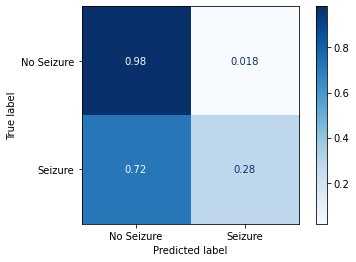

In [ ]:
f1_best_micro[4] = f1_score(test_labels, lsv_predict_2, average='micro', zero_division=0)
f1_best_macro[4] = f1_score(test_labels, lsv_predict_1, average='macro', zero_division=0)
class_labels = ['No Seizure','Seizure']
# print a pretty confusion matrix version
print("Classification report for F1-macro Optimized Linear SVC Classifier.\n")
print(classification_report(test_labels, lsv_predict_1,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(lsv_cv_1, test_data, test_labels,
                              display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

Classification report for F1-micro Optimized Linear SVC Classifier.

              precision    recall  f1-score   support

  No Seizure       0.84      0.97      0.90      2759
     Seizure       0.68      0.29      0.41       691

    accuracy                           0.83      3450
   macro avg       0.76      0.63      0.65      3450
weighted avg       0.81      0.83      0.80      3450

[[0.96665458 0.03334542]
 [0.7105644  0.2894356 ]]


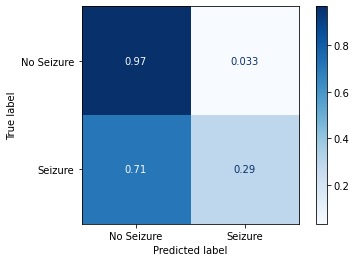

In [ ]:
print("Classification report for F1-micro Optimized Linear SVC Classifier.\n")
print(classification_report(test_labels, lsv_predict_2,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(lsv_cv_2, test_data, test_labels,
                              display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

### Polynomial Kernel SVC
Για τους μή-γραμμικούς πυρήνες θα δοκιμάσουμε πρώτα πολυωνυμικό (poly kernel).

In [ ]:
psv_pipe = Pipeline([
    ('selector', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('psv',SVC(kernel='poly',random_state=0)),
], memory='tmp')

n_components = [ 80,100 ]
vthreshold = [ 52000, 55000, 57000]
degree = range(2,5)
gamma = ['auto','scale']
tolerance = [1e-5 , 1e-4]
c = [50, 52, 54]
params = dict(
    selector__threshold = vthreshold,
    pca__n_components = n_components,
    psv__tol = tolerance,
    psv__C = c,
    psv__degree = degree,
    psv__gamma = gamma,
)

start = datetime.now() # <-- Start timing from here
psv_cv_1 = GridSearchCV(psv_pipe,params, scoring='f1_macro', cv=5,n_jobs=-1)
psv_cv_1.fit(train_data, train_labels)
psv_cv_2 = GridSearchCV(psv_pipe,params, scoring='f1_micro', cv=5,n_jobs=-1)
psv_cv_2.fit(train_data, train_labels)
end = datetime.now() # <-- Stop timing here
print('Training poly SVC done. Time: '+str(end-start))

psv_predict_1 = psv_cv_1.predict(test_data)
psv_predict_2 = psv_cv_2.predict(test_data)
print('Macro Optimization best params:')
print(psv_cv_1.best_params_)
print('Micro Optimization best params:')
print(psv_cv_2.best_params_)

Training poly SVC done. Time: 2:17:54.519780
Macro Optimization best params:
{'pca__n_components': 80, 'psv__C': 54, 'psv__degree': 3, 'psv__gamma': 'auto', 'psv__tol': 1e-05, 'selector__threshold': 52000}
Micro Optimization best params:
{'pca__n_components': 80, 'psv__C': 54, 'psv__degree': 3, 'psv__gamma': 'auto', 'psv__tol': 1e-05, 'selector__threshold': 52000}


Classification report for F1-Macro Optimized Poly SVC Classifier.

              precision    recall  f1-score   support

  No Seizure       0.88      1.00      0.94      2763
     Seizure       0.96      0.48      0.64       687

    accuracy                           0.89      3450
   macro avg       0.92      0.74      0.79      3450
weighted avg       0.90      0.89      0.88      3450

[[0.99565689 0.00434311]
 [0.52401747 0.47598253]]


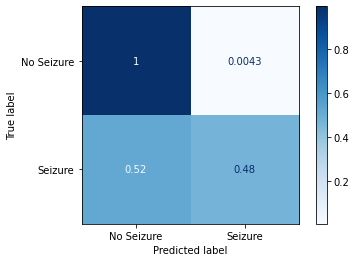

In [ ]:
f1_best_micro[5] = f1_score(test_labels, psv_predict_2, average='micro', zero_division=0)
f1_best_macro[5] = f1_score(test_labels, psv_predict_1, average='macro', zero_division=0)

class_labels = ["No Seizure", "Seizure"]
# print a pretty confusion matrix version
print("Classification report for F1-Macro Optimized Poly SVC Classifier.\n")
print(classification_report(test_labels, psv_predict_1,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(psv_cv_1, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

### Radial Basis Kernel SVC

Και στη συνέχεια δοκιμάζουμε SVC πυρίνα Radial Basis.

In [ ]:
rsv_pipe = Pipeline([
    ('selector', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('rsv',SVC(kernel='rbf',random_state=0)),
], memory='tmp')

n_components = [60,80,100]
vthreshold = [ 52000, 55000, 57000]
gamma = ['auto','scale']
tolerance = [1e-5 , 1e-4]
c = [42,44,46,48]
params = dict(
    selector__threshold = vthreshold,
    pca__n_components = n_components,
    rsv__tol = tolerance,
    rsv__C = c,
    rsv__gamma = gamma,
)

start = datetime.now() # <-- Start timing from here
rsv_cv_1 = GridSearchCV(rsv_pipe,params, scoring='f1_macro', cv=5,n_jobs=-1)
rsv_cv_1.fit(train_data, train_labels)
rsv_cv_2 = GridSearchCV(rsv_pipe,params, scoring='f1_micro', cv=5,n_jobs=-1)
rsv_cv_2.fit(train_data, train_labels)
end = datetime.now() # <-- Stop timing here
print('Training rbf SVC done. Time: '+str(end-start))

rsv_predict_1 = rsv_cv_1.predict(test_data)
rsv_predict_2 = rsv_cv_2.predict(test_data)
print('F1 Macro Optimized Params:')
print(rsv_cv_1.best_params_)
print('F1 Micro Optimized Params:')
print(rsv_cv_2.best_params_)

Training rbf SVC done. Time: 0:33:45.318186
F1 Macro Optimized Params:
{'pca__n_components': 60, 'rsv__C': 42, 'rsv__gamma': 'auto', 'rsv__tol': 1e-05, 'selector__threshold': 52000}
F1 Micro Optimized Params:
{'pca__n_components': 60, 'rsv__C': 42, 'rsv__gamma': 'auto', 'rsv__tol': 1e-05, 'selector__threshold': 52000}


Classification report for F1 Macro Optimized Linear SVC Classifier.

              precision    recall  f1-score   support

  No Seizure       0.98      0.99      0.98      2763
     Seizure       0.94      0.94      0.94       687

    accuracy                           0.98      3450
   macro avg       0.96      0.96      0.96      3450
weighted avg       0.98      0.98      0.98      3450

[[0.98516106 0.01483894]
 [0.06259098 0.93740902]]


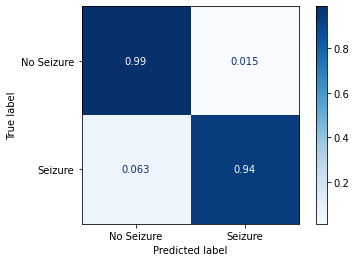

In [ ]:
f1_best_micro[6] = f1_score(test_labels, rsv_predict_2, average='micro', zero_division=0)
f1_best_macro[6] = f1_score(test_labels, rsv_predict_1, average='macro', zero_division=0)

# print a pretty confusion matrix version
print("Classification report for F1 Macro Optimized Linear SVC Classifier.\n")
print(classification_report(test_labels, rsv_predict_1,
                            target_names=class_labels, zero_division=0))
disp = plot_confusion_matrix(rsv_cv_1, test_data, test_labels,
                             display_labels=class_labels,
                             cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

## Σύγκριση και Συμπεράσματα 

Στην συνέχεια της βελτιστοποίσης, δείχνουμε στον παρακάτω πίνακα τους χρόνους εκπαίδευσης του κάθε ταξινομητή. Επισημαίνουμε την σημασία που έχει στην ικανότητα σύγκλισης των SVM η κατάλληλη επιλογή συνάρτησης πυρήνα. Μόνο ο πυρήνας RBF επιτυγχάνει ικανοποιητική σύγκλιση, και μάλιστα η βελτριστοποίηση του dataset δεν συνεισφέρει όσο η σωστή επιλογή πυρήνα. 

| Classifier              | Training Time (No Optimization) | Train Time (Cross Validation) |
|-------------------------|---------------------------------|-------------------------------|
| Dummy                   | 0:00:00.00168                   | 0:03:15.344                |
| Gaussian Naive Bayesian | 0:00:00.04299                   | 0:00:48.745                |
| KNN                     | 0:00:00.17713                   | 6:22:13.369                |
| MLP                     | 0:00:06.97842                   | 5:34:49.529                |
| Support Vector (RBF)    | 0:00:02.281518                  | 0:33:45.318                |
| Support Vector (Poly)   |                                 | 2:17:54.519                |
| Support Vector (Lin)    |                                 | 5:40:33.045                |

Επιπλέον στα διαγράμματα που ακολουθούν δείχνουμε τις μετρικές f1 micro και macro για καθέναν από τους βελτιστοποιημένους ταξινομητές, και στην συνέχεια δείχνουμε την αύξηση της απόδοσης των ταξινομητών με χρήση των τεχνικών προεπεξεργασίας και grid search.

In [ ]:
f1_best_macro = [0.45119329430497873,0.945604652853197,0.8824752746443931, 0.9503614703187049, 0.6860570764431958,0.78704849, 0.96179007]
f1_best_micro = [0.49130434782608695,0.9657971014492753,0.9359420289855073,0.9503614703187049,0.8460869565217393,0.89217391,0.97565217]

In [ ]:
classifiers = ['Dummy', 'GNB','KNN','MLP','Linear SVC','Poly SVC','RBF SVC']

fig = go.Figure([
    go.Bar(name='Macro',x=classifiers, y=f1_best_macro,
          text=f1_best_macro),
    go.Bar(name='Micro',x=classifiers, y=f1_best_micro,
          text=f1_best_micro)
])
fig.update_traces(texttemplate='%{text:.3p}',
                  textposition='outside')
fig.update_layout(
    title_text='F1 Average Scores after CV',
    xaxis_title='Classifier',
    legend_title='Averaging Strategy'
)
fig.show()

Ακολουθεί σύγκριση των μετρικών απόδοσης κάθε ταξινομητή πριν και μετά την βελτιστοποίηση. Το ύψος της μπάρας δίνει σε κάθε διάγραμμα την απόλυτη τιμή της μέτρησης, ενώ το ποσοστό που αναγράφεται είναι η μεταβολή της μετρικής σε σχέση με την baseline μέτρηση.

In [ ]:
fig = go.Figure([
    go.Bar(name='Macro', x=['Baseline','Optimized'], y=[f1_scores_macro[0], f1_best_macro[0]],
          text=np.array([f1_scores_macro[0], f1_best_macro[0]]/f1_scores_macro[0])),
    go.Bar(name='Micro', x=['Baseline','Optimized'], y=[f1_scores_micro[0], f1_best_micro[0]],
          text=np.array([f1_scores_micro[0], f1_best_micro[0]]/f1_scores_micro[0]))
])
fig.update_traces(texttemplate='%{text:.3p} base',
                  textposition='outside')
fig.update_layout(
    title_text='F1 Score Increase for Dummy',
    legend_title='Averaging Strategy'
)

Στο παραπάνω σχήμα φαίνεται εντυπωσιακά ότι η απόδοση του dummy classifier έχει πέσει από το baseline μετά την εφαρμογή προεπεξεργασίας. Θεωρούμε οτι αυτό οφείλεται 1) στην εφαρμογή PCA στο dataset και άρα στην μείωση των διαθέσιμων χαρακτηριστικών για την εκπαίδευση του dummy και 2) στο oversampling που εξισορρόπησε τις δυο κλάσσεις, και άρα δεν μπόρεσε ο ταξινομητής να εκπαιδευτεί στην πιθανότητα εμφάνισης της κάθε μιας.

In [ ]:
i=1
fig = go.Figure([
    go.Bar(name='Macro', x=['Baseline','Optimized'], y=[f1_scores_macro[i], f1_best_macro[i]],
          text=np.array([f1_scores_macro[i], f1_best_macro[i]]/f1_scores_macro[i])),
    go.Bar(name='Micro', x=['Baseline','Optimized'], y=[f1_scores_micro[i], f1_best_micro[i]],
          text=np.array([f1_scores_micro[i], f1_best_micro[i]]/f1_scores_micro[i]))
])
fig.update_traces(texttemplate='%{text:.3p} base',
                  textposition='outside')
fig.update_layout(
    title_text='F1 Score Increase for GNB',
    legend_title='Averaging Strategy'
)

Σε αυτή τη περίπτωση βλέπουμε εντυπωσιακά οτι δεν υπήρχε μεταβολή μεταξύ της βασικής και βελτιστοποιημένης έκδοσης του ταξινομητή. Αξίζει όμως να σημειωθεί ότι στο optimized μοντέλο, *δεν χρησημοποιήσαμε PCA* επειδή είδαμε οτι πάλι θα παραγόντουσαν χειρότερα αποτελέσματα. Όπως αναφέραμε, έχουμε χρησημοποιήσει scaling και oversampling στην προεπεξεργασία δεδομένων, αλλά δεν καταφέραμε να βελτιώσουμε την σύγκλιση του μοντέλου.

In [ ]:
i=2
fig = go.Figure([
    go.Bar(name='Macro', x=['Baseline','Optimized'], y=[f1_scores_macro[i], f1_best_macro[i]],
          text=np.array([f1_scores_macro[i], f1_best_macro[i]]/f1_scores_macro[i])),
    go.Bar(name='Micro', x=['Baseline','Optimized'], y=[f1_scores_micro[i], f1_best_micro[i]],
          text=np.array([f1_scores_micro[i], f1_best_micro[i]]/f1_scores_micro[i]))
])
fig.update_traces(texttemplate='%{text:.3p} base',
                  textposition='outside')
fig.update_layout(
    title_text='F1 Score Increase for KNN',
    legend_title='Averaging Strategy'
)

In [ ]:
i=3
fig = go.Figure([
    go.Bar(name='Macro', x=['Baseline','Optimized'], y=[f1_scores_macro[i], f1_best_macro[i]],
          text=np.array([f1_scores_macro[i], f1_best_macro[i]]/f1_scores_macro[i])),
    go.Bar(name='Micro', x=['Baseline','Optimized'], y=[f1_scores_micro[i], f1_best_micro[i]],
          text=np.array([f1_scores_micro[i], f1_best_micro[i]]/f1_scores_micro[i]))
])
fig.update_traces(texttemplate='%{text:.3p} base',
                  textposition='outside')
fig.update_layout(
    title_text='F1 Score Increase for MLP',
    legend_title='Averaging Strategy'
)

Στα παραπάνω δυο σχήματα βλέπουμε μια μικρή βελτίωση της απόδοσης του KNN και μια λίγο πιο αξιόλογη αύξηση της απόδοσης του MLP. Θεωρούμε οτι η χρήση του MLP αποδεικνύεται πάλι κακιά επιλογή για αυτό το πρόβλημα, αφού μια μακρά διαδικασία βελτιστοποίησης των υπερπαραμέτρων του δεν κατάφερε να ξεπεράσει την απόδοση των GNB, KNN και του RBF SVC. Παρ' όλα αυτά, η αύξηση της απόδοσης σε σχέση με το baseline είναι σαφής.

In [ ]:
# sorry for ugly code here
vals_macro = np.zeros(4)
vals_micro = np.zeros(4)

vals_macro[0] = f1_scores_macro[4]
vals_macro[1:] =  f1_best_macro[4:7]
vals_micro[0] = f1_scores_micro[4]
vals_micro[1:] =  f1_best_micro[4:7]

fig = go.Figure([
    go.Bar(name='Macro', x=['Baseline','Lin SVC','Poly SVC', 'RBF SVC'],
           y=vals_macro,
          text=np.array(vals_macro /vals_macro[0])),
    go.Bar(name='Micro', x=['Baseline','Lin SVC','Poly SVC', 'RBF SVC'],
           y=vals_micro,
          text=np.array(vals_micro/vals_micro[0]))
])
fig.update_traces(texttemplate='%{text:.3p} base',
                  textposition='outside')
fig.update_layout(
    title_text='F1 Score Increase for SVC',
    legend_title='Averaging Strategy'
)

Τέλος, βλέπουμε πως η βελτίωση ή μη της απόδοσης του SVC εξαρτάται κατά κύριο λόγο από την σωστή επιλογή του πυρήνα. Με την χρήση σωστού πυρήνα όμως, η βελτιστοποίηση υπερπαραμέτρων δεν είναι ιδιαίτερα χρονοβόρα (ειδικά σε σχέση με τα μοντέλα KNN και MLP) και δίνει f1_macro = 0.968 και f1_micro = 0.979. Αυτή η απόδοση είναι η καλύτερη που έχουμε πετύχει και άρα αποτελεί και την τελική επιλογή μας για προβλέπτη σε αυτο το dataset.